Hello

In [1]:
#!/user/local/bin/python2
import matplotlib.pyplot as plt
import numpy as np
import essentia.standard
import librosa.display
import librosa

#Load Audio
loader = essentia.standard.MonoLoader(filename="beltram/clip3.mp3")
audio = loader()

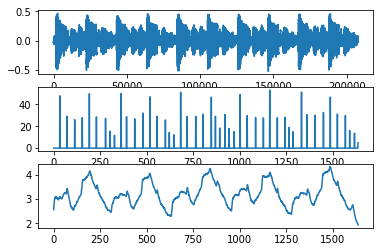

In [36]:
#Get Spectrogram
w = essentia.standard.Windowing(type = 'hann')
spectrum = essentia.standard.Spectrum()  # FFT() would return the complex FFT, here we just want the magnitude spectrum
rms = essentia.standard.RMS()  # FFT() would return the complex FFT, here we just want the magnitude spectrum
mfccs = []
specs = []
rmss = []

for frame in essentia.standard.FrameGenerator(audio, frameSize = 1024, hopSize = 512):
    spec = spectrum(w(frame))
    specs.append(spec)
    rmss.append(rms(frame))

# transpose to have it in a better shape
# we need to convert the list to an essentia.array first (== numpy.array of floats)
mfccs = essentia.array(mfccs).T
# specs = essentia.array(specs).T

rmss_diff = np.diff(rmss)
rmss_diff = np.abs(rmss_diff)

spectralFluxFunction = np.loadtxt(fname="onsetFunction.txt")
averageFunction = np.loadtxt(fname="averageFunction.txt")

onsetTimes = np.loadtxt(fname="out.txt")

onsetTimes *= 44100/128

plt.subplot(311)
plt.plot(audio)
plt.subplot(312)
plt.plot(spectralFluxFunction)
plt.subplot(313)
plt.plot(averageFunction)
# plt.vlines(onsetTimes, 0, 40, colors='r')

plt.show()